### Clone repo

In [2]:
# Only for use in Google colab:
!git clone -b landscape https://github.com/mhsiu01/resnet.git
%cd resnet/
!ls

Cloning into 'resnet'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 47 (delta 14), reused 13 (delta 2), pack-reused 8
Receiving objects: 100% (47/47), 124.72 MiB | 31.74 MiB/s, done.
Resolving deltas: 100% (15/15), done.
/content/resnet
colab_wrapper.ipynb	    landscape.py	plots	   utils_clean.py
data			    landscape_utils.py	README.md
dataloading.py		    model_clean.py	test.py
landscape_playground.ipynb  models		train.py


### ffcv install

In [3]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    # Install commands from https://colab.research.google.com/github/mosaicml/composer/blob/75dabff3f5715f02bfc32cc23c557ba4042c462d/examples/ffcv_dataloaders.ipynb
    !apt update && apt install -y --no-install-recommends libopencv-dev libturbojpeg-dev;
    !cp -f /usr/lib/x86_64-linux-gnu/pkgconfig/opencv.pc /usr/lib/x86_64-linux-gnu/pkgconfig/opencv4.pc;
    !pip install ffcv numba opencv-python;

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [517 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [44.0 kB]
Get:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,016 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,144 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRele

### Train model from scratch

In [ ]:
# Only for use in Google colab:
!python train.py --beton 0

{   'BS': 128,
    'IN_COLAB': True,
    'SCALER': 4,
    'USE_FLOAT16': True,
    'k': 1,
    'lengths': [40000, 10000],
    'model_save': '',
    'n': 3,
    'no_skip': False,
    'norms': False,
    'num_classes': 100,
    'num_epochs': 120,
    'plot_save': '',
    'write_beton': False}
Using existing .beton files.
Files already downloaded and verified
Files already downloaded and verified
Batch size is 128x4 = 512.
total params:278324
Learning rate scaled by x4.
  0% 0/120 [00:00<?, ?it/s]Epoch #0 has lr=[0.08000000000000002]
val_acc = 6.91
t = 15.309

  1% 1/120 [00:15<30:21, 15.31s/it]Epoch #1 has lr=[0.16000000000000003]
val_acc = 10.46
t = 3.481

  2% 2/120 [00:18<16:25,  8.35s/it]Epoch #2 has lr=[0.24]
val_acc = 10.24
t = 3.836

  2% 3/120 [00:22<12:15,  6.29s/it]Epoch #3 has lr=[0.32000000000000006]
val_acc = 13.85
t = 3.846

  3% 4/120 [00:26<10:17,  5.32s/it]Epoch #4 has lr=[0.4]
val_acc = 14.32
t = 3.478

  4% 5/120 [00:29<08:55,  4.66s/it]Epoch #5 has lr=[0.4]
val_acc = 

### Visualize loss landscape

In [1]:
checkpoint = "cifar100_resnet18k8_50k_BS128x4"

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

In [2]:
if IN_COLAB:
    # Only for use in Google colab:
    !python landscape.py --model $checkpoint --R 1.0 --steps 20

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
vmin=0.0
vmax=7.0


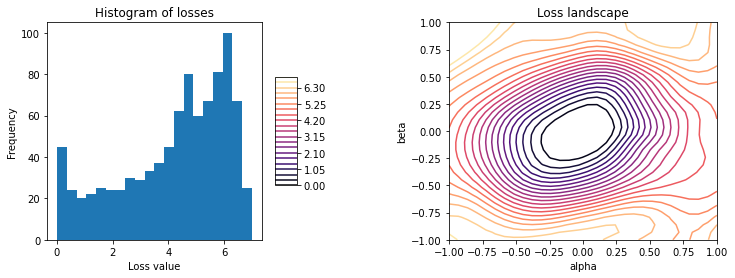

In [14]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import torch
from landscape_utils import plot_landscape
if IN_COLAB:
    model = torch.load(f"/content/resnet/models/{checkpoint}.pth")
else:
    model = torch.load(f"./models/{checkpoint}.pth")
plot_landscape(model, plot_type='contour', vmin=0.0, vmax=7.0) # Handtune the vmax!